In [443]:
import numpy as np
import pandas as pd  
import statsmodels.formula.api as sm
import math
# set up the environment
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
sns.set()
import pandas as pd
import scipy as sp
import scipy.stats
import statsmodels.formula.api as smf
from arch.bootstrap import IIDBootstrap
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


1.a.

In [7]:
df=pd.read_table('card.dat', sep='\t')
for i in range(len(df["wage"])):
    df.loc[i,"logwage"]=math.log(df.loc[i,"wage"])

In [8]:
a_formula='logwage ~ educ + exper + I(exper**2) + south + black'
a_model = sm.ols(formula = a_formula, data = df).fit()
a_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logwage   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     137.5
Date:                Sun, 06 May 2018   Prob (F-statistic):          3.65e-127
Time:                        19:38:49   Log-Likelihood:                -1021.0
No. Observations:                2215   AIC:                             2054.
Df Residuals:                    2209   BIC:                             2088.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.7351      0.080     59.472      0.000       4.579       4.891
educ              0.0802      0.004     19.458      0.000       0.072       0.088
exper             0.0893      0.008     11.074      0.000       0.074       0.105
I(exper ** 2)    -0.0025      0.000     -6.065      0.000      -0.003      -0.002
south            -0.1359      0.018     -7.656      0.000      -0.171      -0.101
black            -0.1591      0.024     -6.692      0.000      -0.206      -0.112
==============================================================================
Omnibus:                       50.607   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.572
Skew:                          -0.294   Prob(JB):                     2.59e-14
Kurtosis:                       3.576   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Coefficient for educ has the confidence interval between 0.072 and 0.088. As the years of education increases, the income also increases. However, there are many other different factors that might result in such positive correlation. For example, people who receive more education might come from a better family background and so it might be easier to use their connections to find a job that has higher income. Therefore, we can't conclude that higher education causes to higher income.  

1.b.

nearc4 is a good iv for the following reasons:
igonorability: when conditioned on some variables, for example experience and demographics, nearc4 can in some sense give ignorability. Given people from the same experience and demographics group, whether one lives near a 4 year college is randomized. 
relevant: it is pretty easy to explain that cov(educ,nearc4) doesn't equal to zero. One possible explaination can be given some control variables, people who live near a 4 year college is likely to be "culturally" influenced by the academic atmosphere of a collegetown, and thus they are more likely to be willing to pursue a higher education.
exclusion restriction: this rule is not perfectly followed. In general, staying near 4 year college should not affect your income level. However, this can be violated. For example, those who stay near a 4 year college might look for jobs near a 4 year college, and that can affect the income level.  

1.c.

In [9]:
c_formula='educ ~ nearc4 + exper + I(exper**2) + south + black'
c_model = sm.ols(formula = c_formula, data = df).fit()
educHat = c_model.predict(df[["nearc4","exper","south","black"]])
df_educHat=pd.DataFrame(educHat)
df_educHat.columns=["educHat"]
df = pd.concat([df, df_educHat], axis=1)
c1_formula='logwage ~ educHat + exper + I(exper**2) + south + black'
c1_model = sm.ols(formula = c1_formula, data = df).fit()
original=c1_model.params['educHat']

In [18]:
df=pd.read_table('card.dat', sep='\t')
for i in range(len(df["wage"])):
    df.loc[i,"logwage"]=math.log(df.loc[i,"wage"])

In [19]:
def bootstrap(data):
    c_formula='educ ~ nearc4 + exper + I(exper**2) + south + black'
    c_model = sm.ols(formula = c_formula, data = data).fit()
    educHat = c_model.predict(data[["nearc4","exper","south","black"]])
    df_educHat=pd.DataFrame(educHat)
    df_educHat.columns=["educHat"]
    new = pd.concat([data, df_educHat], axis=1)
    c1_formula='logwage ~ educHat + exper + I(exper**2) + south + black'
    c1_model = sm.ols(formula = c1_formula, data = new).fit()
    return c1_model.params['educHat']

In [46]:
sample=[]
for i in range(1000):
    pivotal=2*original-bootstrap(df.sample(df.shape[0],replace=True))
    sample.append(pivotal)
lower = np.percentile(sample,[2.5,97.5])[0]
upper = np.percentile(sample,[2.5,97.5])[1]
print "CI is from", lower, "to ", upper

CI is from 0.0610644401909 to  0.315191705932


3.a.

In [396]:
grade5 = pd.read_table("grade5.csv",delimiter=',')

In [82]:
class_formula1='avgmath ~ classize'
class_model1 = sm.ols(formula = class_formula1, data = grade5).fit()
class_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avgmath   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     101.8
Date:                Mon, 07 May 2018   Prob (F-statistic):           2.15e-23
Time:                        21:33:01   Log-Likelihood:                -7377.0
No. Observations:                2018   AIC:                         1.476e+04
Df Residuals:                    2016   BIC:                         1.477e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.6602      0.977     59.016      0.000      55.744      59.576
classize       0.3217      0.032     10.091      0.000       0.259       0.384
==============================================================================
Omnibus:                       17.909   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.255
Skew:                          -0.233   Prob(JB):                     0.000109
Kurtosis:                       2.990   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
class_formula2='avgmath ~ classize+disadv+enrollment'
class_model2 = sm.ols(formula = class_formula2, data = grade5).fit()
class_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avgmath   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     224.8
Date:                Mon, 07 May 2018   Prob (F-statistic):          8.48e-126
Time:                        21:33:04   Log-Likelihood:                -7135.3
No. Observations:                2018   AIC:                         1.428e+04
Df Residuals:                    2014   BIC:                         1.430e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.0854      1.018     68.842      0.000      68.089      72.082
classize       0.0185      0.037      0.506      0.613      -0.053       0.090
disadv        -0.3317      0.015    -22.234      0.000      -0.361      -0.302
enrollment     0.0171      0.006      2.763      0.006       0.005       0.029
==============================================================================
Omnibus:                        3.240   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                3.262
Skew:                          -0.098   Prob(JB):                        0.196
Kurtosis:                       2.974   Cond. No.                         508.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OLS suggests that the larger the class size, the higher the math score. However, when controlled for disadv, coefficient of class size becomes insignificant.

3.b.

Clearly there is a huge dip in class size around enrollment=40 because of the law by Israel. Right after enrollment=40, it is more likely to have small class than before enrollment=40. Nothing else changed near this threshold. Therefore, the change in average math score near this threshold can only be explained by the enrollment surpass 40. Therefore this dip is exactly the causal local average treatment effect where Z(enrollment)=40. 

3.c.

In [490]:
subgroup=grade5[grade5.enrollment<=60]
subgroup=subgroup[subgroup.enrollment>=20]

In [491]:
subgroup['more']=subgroup['enrollment']-40
class_formula3='avgmath ~ I(enrollment>40)+more+more:I(enrollment>40)'
class_model3 = sm.ols(formula = class_formula3, data = subgroup).fit()
class_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avgmath   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.685
Date:                Wed, 09 May 2018   Prob (F-statistic):           0.000754
Time:                        22:13:18   Log-Likelihood:                -2620.5
No. Observations:                 699   AIC:                             5249.
Df Residuals:                     695   BIC:                             5267.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          60.3794      1.364     44.259      0.000      57.701      63.058
I(enrollment > 40)[T.True]          3.7202      1.682      2.212      0.027       0.417       7.023
more                               -0.2293      0.108     -2.122      0.034      -0.441      -0.017
more:I(enrollment > 40)[T.True]     0.3627      0.136      2.673      0.008       0.096       0.629
==============================================================================
Omnibus:                        8.205   Durbin-Watson:                   1.411
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.228
Skew:                          -0.265   Prob(JB):                       0.0163
Kurtosis:                       3.039   Cond. No.                         79.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I(enrollment > 40)'s CI is from 0.417 to 7.023. This indicates that crossing this threshold results in the higher possibility to get in a small class, and thus higher math score.

In [399]:
class_formula4='avgmath ~ more+I(enrollment>40)+more:I(enrollment>40)+disadv'
class_model4 = sm.ols(formula = class_formula4, data = subgroup).fit()
class_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avgmath   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     81.50
Date:                Wed, 09 May 2018   Prob (F-statistic):           1.04e-56
Time:                        18:43:52   Log-Likelihood:                -2494.4
No. Observations:                 699   AIC:                             4999.
Df Residuals:                     694   BIC:                             5022.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          67.5109      1.212     55.722      0.000      65.132      69.890
I(enrollment > 40)[T.True]          4.2998      1.406      3.058      0.002       1.539       7.060
more                               -0.2647      0.090     -2.931      0.003      -0.442      -0.087
more:I(enrollment > 40)[T.True]     0.2830      0.113      2.494      0.013       0.060       0.506
disadv                             -0.3375      0.019    -17.365      0.000      -0.376      -0.299
==============================================================================
Omnibus:                        3.647   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                3.655
Skew:                          -0.176   Prob(JB):                        0.161
Kurtosis:                       2.967   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I(enrollment > 40)'s CI is from 1.539 to 7.060. This indicates that crossing this threshold results in the higher possibility to get in a small class, and thus higher math score. All the variables are still significant when controlled for disadv. This is unlike part a.

3.d.

In [412]:
from sklearn import neighbors

In [487]:
k = 40
print 'Difference per kNN =',(
    (subgroup.avgmath[(subgroup.enrollment>40) & (subgroup.enrollment<=sorted(subgroup.enrollment[subgroup.enrollment>40])[k])]).mean() -
    (subgroup.avgmath[(subgroup.enrollment<40) & (subgroup.enrollment>=sorted(subgroup.enrollment[subgroup.enrollment<40])[-k])]).mean()
)

Difference per kNN = 1.69241712935


In [492]:
sample=[]
up=(subgroup.avgmath[(subgroup.enrollment>40) & (subgroup.enrollment<=sorted(subgroup.enrollment[subgroup.enrollment>40])[k])])
down=(subgroup.avgmath[(subgroup.enrollment<40) & (subgroup.enrollment>=sorted(subgroup.enrollment[subgroup.enrollment<40])[-k])])
def diff(u,d):
    return u.mean()-d.mean()

In [500]:
for i in range(1000):
    pivotal=2*original-diff(up.sample(up.shape[0],replace=True),down.sample(down.shape[0],replace=True))
    sample.append(pivotal)
lower = np.percentile(sample,[2.5,97.5])[0]
upper = np.percentile(sample,[2.5,97.5])[1]
print "CI is from", lower, "to ", upper

CI is from -5.72164059201 to  2.96871174195


The KNN difference we calculated is in the confidence interval, however, this confidence interval doesn't hundred percent comply with the OLS RDD result. This CI indicates math score can go down as enrollment larger than 40, and this doesn't comply with the result from OLS. This CI can't help me draw a conclusion of whether enrollment larger than 40 result in higher or lower math score. So this is not a good model. 

3.e.

In [ ]:
classizeHat = e_model.predict(subgroup[["enrollment"]])
df_classizeHat=pd.DataFrame(classizeHat)
df_classizeHat.columns=["classizeHat"]
new = pd.concat([subgroup, df_classizeHat], axis=1)
e1_formula='avgmath ~ classizeHat+I(classizeHat>30)'
e1_model = sm.ols(formula = e1_formula, data = new).fit()
e1_model.summary()

In [459]:
subgroup["class30"]=10
subgroup.class30[subgroup['classize']>30]=0
subgroup.class30[subgroup['classize']<=30]=1

/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [460]:
#fuzzy OLS
e_formula='class30 ~ I(enrollment>40)+more+more:I(enrollment>40)'
e_model = smf.logit(formula =e_formula, data = subgroup).fit()
e_model.summary()

Optimization terminated successfully.
         Current function value: 0.300246
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                class30   No. Observations:                  699
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            3
Date:                Wed, 09 May 2018   Pseudo R-squ.:                  0.2236
Time:                        19:31:36   Log-Likelihood:                -209.87
converged:                       True   LL-Null:                       -270.33
                                        LLR p-value:                 4.892e-26
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -1.2913      0.333     -3.875      0.000      -1.945      -0.638
I(enrollment > 40)[T.True]          4.3426      0.526      8.257      0.000       3.312       5.373
more                               -0.2871      0.041     -6.966      0.000      -0.368      -0.206
more:I(enrollment > 40)[T.True]     0.2390      0.052      4.637      0.000       0.138       0.340
===================================================================================================
"""

In [461]:
classizeBin = e_model.predict(subgroup)
df_classizeBin=pd.DataFrame(classizeBin)
df_classizeBin.columns=["classizeBin"]
new = pd.concat([subgroup, df_classizeBin], axis=1)
e1_formula='avgmath ~ I(classizeBin>0.5)+I(enrollment>40)+more+more:I(enrollment>40)'
e1_model = sm.ols(formula = e1_formula, data = new).fit()

In [462]:
e1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avgmath   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4.864
Date:                Wed, 09 May 2018   Prob (F-statistic):           0.000712
Time:                        19:41:01   Log-Likelihood:                -2619.3
No. Observations:                 699   AIC:                             5249.
Df Residuals:                     694   BIC:                             5271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          59.2977      1.533     38.669      0.000      56.287      62.309
I(classizeBin > 0.5)[T.True]        3.7469      2.435      1.539      0.124      -1.034       8.527
I(enrollment > 40)[T.True]          1.0551      2.413      0.437      0.662      -3.683       5.793
more                               -0.0554      0.156     -0.354      0.723      -0.362       0.251
more:I(enrollment > 40)[T.True]     0.1888      0.176      1.070      0.285      -0.158       0.535
==============================================================================
Omnibus:                        8.008   Durbin-Watson:                   1.412
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.091
Skew:                          -0.264   Prob(JB):                       0.0175
Kurtosis:                       2.995   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [483]:
#tao1
new["smallBin"]=classizeBin
up=new[new.enrollment>40]['smallBin'].sum()/new[new.enrollment>40]['smallBin'].shape[0]
low=new[new.enrollment<40]['smallBin'].sum()/new[new.enrollment<40]['smallBin'].shape[0]
tao1=up-low
#tao2
math_pred = e1_model.predict(new)
new["math_pred"]=math_pred
up2=new[new.enrollment>40]['math_pred'].mean()
low2=new[new.enrollment<40]['math_pred'].mean()
tao2=up2-low2

In [501]:
#tao
tao_ols=tao2/tao1
print "tao for OLS is ", tao_ols

tao for OLS is  17.0321502198


In [488]:
k = 40
print 'Difference per kNN =',(
    (new.math_pred[(new.enrollment>40) & (new.enrollment<=sorted(new.enrollment[new.enrollment>40])[k])]).mean() -
    (new.math_pred[(new.enrollment<40) & (new.enrollment>=sorted(new.enrollment[new.enrollment<40])[-k])]).mean()
)

Difference per kNN = 3.98989811536


In [489]:
#fuzzy knn
tao_knn=3.98989811536/tao1
print "tao for OLS is ", tao_knn

tao for OLS is  27.608205808


Both fuzzy OLS and KNN concludes that the smaller the class, the higher the average math score. I think fuzzy RDD is a better model here. As we look at the data, when enrollment>40, we don't always have a small class. In affect, we still have many large class. Sharp RDD assumes that the threshold results in the direct decrease in the class size, which is not really the case. Sharp KNN RDD also has a CI that can't allow us to draw any conclusion. On the other hand, fuzzy RDD performs much better. It use enrollment>40 to predict the possibility of being in a small class (here we assume 30), and then use this predicted small class to predict the math score. Here we have a much clearer and stronger result. 

5.a.

In [259]:
def a_Bayesian_P(y,b):
    return math.exp((-y**2)/2)/(math.exp((-y**2)/2)+(math.sqrt(1+b**2)/(2*math.pi*b**2))*math.exp(0.5*(-y**2)+0.5*((b**2)*(y**2)/(1+b**2))))

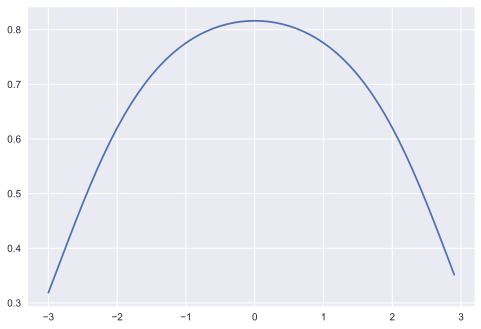

In [260]:
#fix b=1, change y
y=np.arange(-3, 3, 0.1)
b=1
P=[]
for i in range(len(y)):
    P.append(a_Bayesian_P(y[i],b))
plot(y,P)

If you fix fix b=1, u=0,change y from -3 to 3, you see that this is an inverse parabola, y=0 has the highest H0. This is because the true u is most likely to be 0.

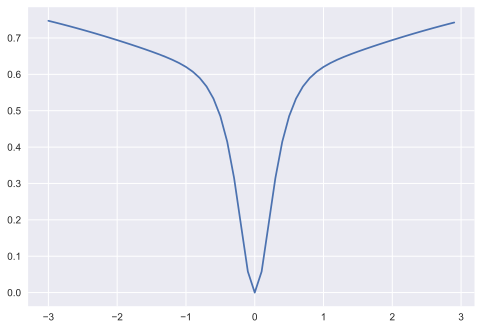

In [519]:
#fix y=0, change b
y=2
b=np.arange(-3, 3, 0.1)
P=[]
for i in range(len(b)):
    P.append(a_Bayesian_P(y,b[i]))
plot(b,P)

If we fix y=0, and change b we see that as b increases, H0 is more likely to be zero. This is because when b is large, u comes from a wider distribution, and thus 

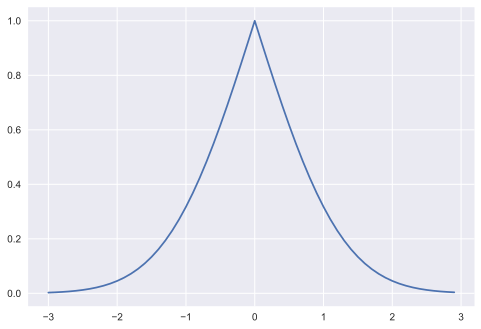

In [263]:
#wald p-value
y=np.arange(-3, 3, 0.1)
P=2*(1-scipy.stats.norm.cdf(abs(y)))
plot(y,P)

5.b.

In [278]:
def b_Bayesian_P(y,b):
    return math.exp((-sum(y**2))/2)/(math.exp((-sum(y**2))/2)+(math.sqrt(1+len(y)*b**2)/(2*len(y)*math.pi*b**2))*math.exp(0.5*(-sum(y**2))+0.5*((b**2)*(sum(y)**2)/(1+len(y)*b**2))))

In [314]:
def y_gen(u,size):
    return np.random.normal(u,1,size)

In [321]:
#fix u=0, b=1, change size of y
P=[]
P_bar=[]
PW=[]
for i in range(20):
    P.append([])
    PW.append([])
    P_bar.append([])
    for j in range(3000):
        Y=y_gen(0,(i+1)*5)
        P[i].append(b_Bayesian_P(Y,1)) 
        PW[i].append(2*(1-scipy.stats.norm.cdf(abs(sum(Y)/math.sqrt(len(Y))))))
        P_bar[i].append(np.std(Y)/len(Y))
P=np.array(P)
PW=np.array(PW)
P_bar=np.array(P_bar)

In [322]:
P_value=[]
for i in range(20):
    P_value.append(np.mean(P[i]))
PW_value=[]
for i in range(20):
    PW_value.append(np.mean(PW[i]))
Pbar_value=[]
for i in range(20):
    Pbar_value.append(np.mean(P_bar[i]))

<Container object of 3 artists>

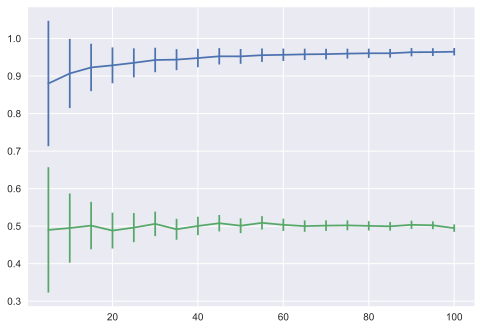

In [323]:
import matplotlib.pyplot as plt
plt.errorbar(np.arange(5, 105, 5),P_value,yerr=Pbar_value)
plt.errorbar(np.arange(5, 105, 5),PW_value,yerr=Pbar_value)

<Container object of 3 artists>

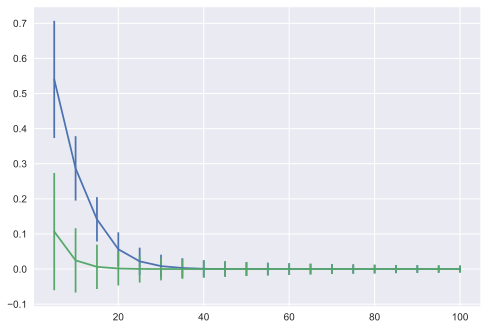

In [324]:
#fix u=1, b=1, change size of y
P=[]
P_bar=[]
PW=[]
for i in range(20):
    P.append([])
    PW.append([])
    P_bar.append([])
    for j in range(3000):
        Y=y_gen(1,(i+1)*5)
        P[i].append(b_Bayesian_P(Y,1)) 
        PW[i].append(2*(1-scipy.stats.norm.cdf(abs(sum(Y)/math.sqrt(len(Y))))))
        P_bar[i].append(np.std(Y)/len(Y))
P=np.array(P)
PW=np.array(PW)
P_bar=np.array(P_bar)
P_value=[]
for i in range(20):
    P_value.append(np.mean(P[i]))
PW_value=[]
for i in range(20):
    PW_value.append(np.mean(PW[i]))
Pbar_value=[]
for i in range(20):
    Pbar_value.append(np.mean(P_bar[i]))
plt.errorbar(np.arange(5, 105, 5),P_value,yerr=Pbar_value)
plt.errorbar(np.arange(5, 105, 5),PW_value,yerr=Pbar_value)

5.c.

In graph d below, when b is much smaller than bhat, posterior probability of H0 can be large even when the p-value is small,especially when n is large. 
In the other graphs we can see taht bayesian method always converge to the correct result slower than the wald test pvalue. 

In [367]:
def vary(b,bhat):
    P=[]
    P_bar=[]
    PW=[]
    b=b
    bhat=bhat
    u=np.random.normal(0,bhat,3000)
    for i in range(20):
        P.append([])
        PW.append([])
        P_bar.append([])
        for j in range(3000):
            Y=y_gen(u[j],(i+1)*5)
            P[i].append(b_Bayesian_P(Y,b)) 
            PW[i].append(2*(1-scipy.stats.norm.cdf(abs(sum(Y)/math.sqrt(len(Y))))))
            P_bar[i].append(np.std(Y)/len(Y))

    P=np.array(P)
    PW=np.array(PW)
    P_bar=np.array(P_bar)
    P_value=[]
    for i in range(20):
        P_value.append(np.mean(P[i]))
    PW_value=[]
    for i in range(20):
        PW_value.append(np.mean(PW[i]))
    Pbar_value=[]
    for i in range(20):
        Pbar_value.append(np.mean(P_bar[i]))
    plt.errorbar(np.arange(5, 105, 5),P_value,yerr=Pbar_value)
    plt.errorbar(np.arange(5, 105, 5),PW_value,yerr=Pbar_value)

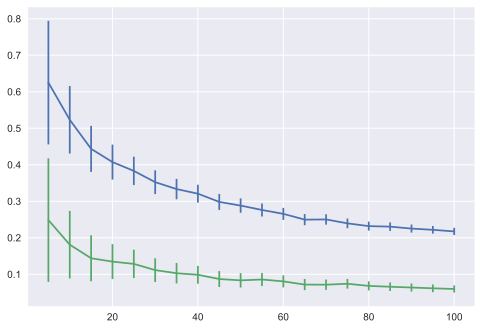

In [376]:
#graph a 
vary(1,1)

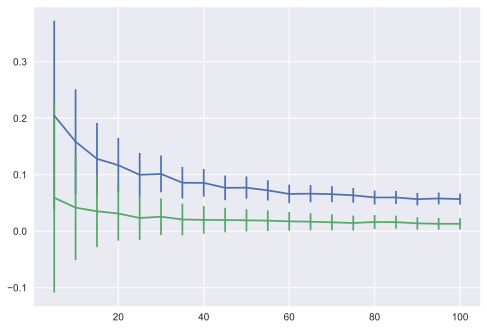

In [369]:
#graph b
vary(5,5)

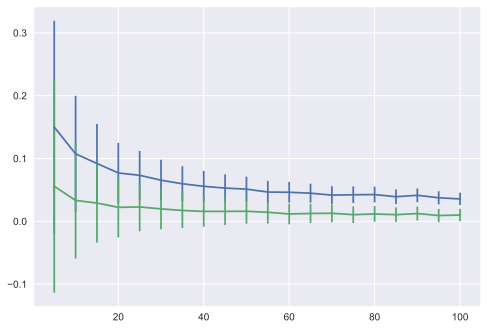

In [395]:
#graph c
vary(1,5)

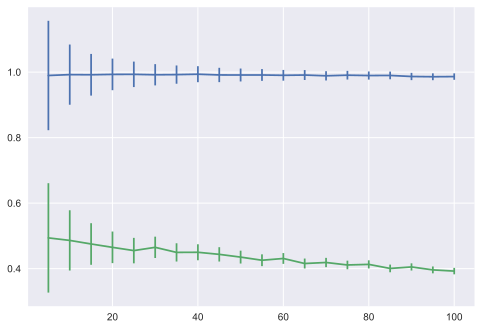

In [377]:
#graph d
vary(20,0.1)

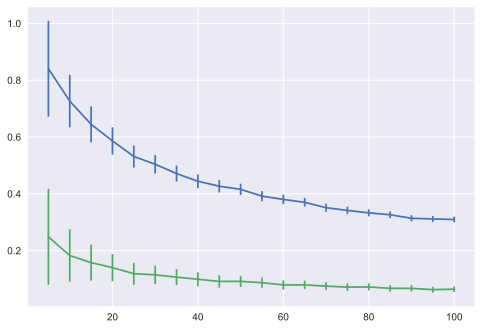

In [506]:
vary(50,1)